In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [45]:
day_n2 = pd.read_csv('./data/prices_round_1_day_-2.csv', sep=';')
day_n1 = pd.read_csv('./data/prices_round_1_day_-1.csv', sep=';')
day_0 = pd.read_csv('./data/prices_round_1_day_0.csv', sep=';')
day_n2.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
1,-2,0,PEARLS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.000000
2,-2,100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
3,-2,100,PEARLS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,-8.000000
4,-2,200,PEARLS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,-8.000000


In [46]:
dn2_b = day_n2[day_n2['product'] == 'BANANAS']
dn1_b = day_n1[day_n1['product'] == 'BANANAS']
d0_b = day_0[day_0['product'] == 'BANANAS']
dn2_b

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.000000
2,-2,100,BANANAS,4997,20,NaN,NaN,NaN,NaN,4998,1,5004.0,20.0,NaN,NaN,4997.5,2.863281
5,-2,200,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,31,NaN,NaN,NaN,NaN,5000.5,2.536621
7,-2,300,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,27,NaN,NaN,NaN,NaN,5000.5,2.405762
9,-2,400,BANANAS,4997,20,NaN,NaN,NaN,NaN,5002,9,5004.0,20.0,NaN,NaN,4999.5,2.925781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,-2,999500,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,26,NaN,NaN,NaN,NaN,4947.5,223680.000000
19992,-2,999600,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,30,NaN,NaN,NaN,NaN,4949.0,219260.000000
19994,-2,999700,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,22,NaN,NaN,NaN,NaN,4948.5,214296.000000
19996,-2,999800,BANANAS,4946,26,NaN,NaN,NaN,NaN,4950,9,4952.0,26.0,NaN,NaN,4948.0,213364.000000


In [47]:
log_ret = np.log(dn2_b['mid_price'] / dn2_b['mid_price'].shift(1))
log_ret

0             NaN
2       -0.000500
5        0.000600
7        0.000000
9       -0.000200
           ...   
19990   -0.000707
19992    0.000303
19994   -0.000101
19996   -0.000101
19999    0.000101
Name: mid_price, Length: 10000, dtype: float64

In [48]:
res = adfuller(log_ret[1:])
print(f'ADF Statistic: {res[0]}')
print(f'p-value: {res[1]}')
res

ADF Statistic: -40.00142021520785
p-value: 0.0


(-40.00142021520785,
 0.0,
 10,
 9988,
 {'1%': -3.4310048840021,
  '5%': -2.861829419734687,
  '10%': -2.5669240529873334},
 -134930.76113755838)

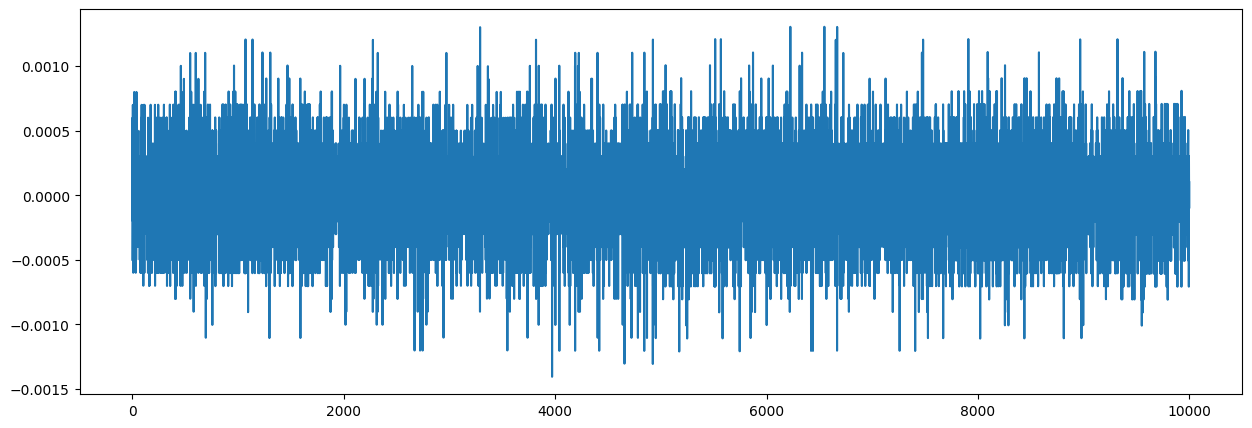

In [49]:
x = np.arange(0, len(log_ret) - 1)
plt.figure(figsize=(15, 5))
plt.plot(x, log_ret[1:])
plt.show()

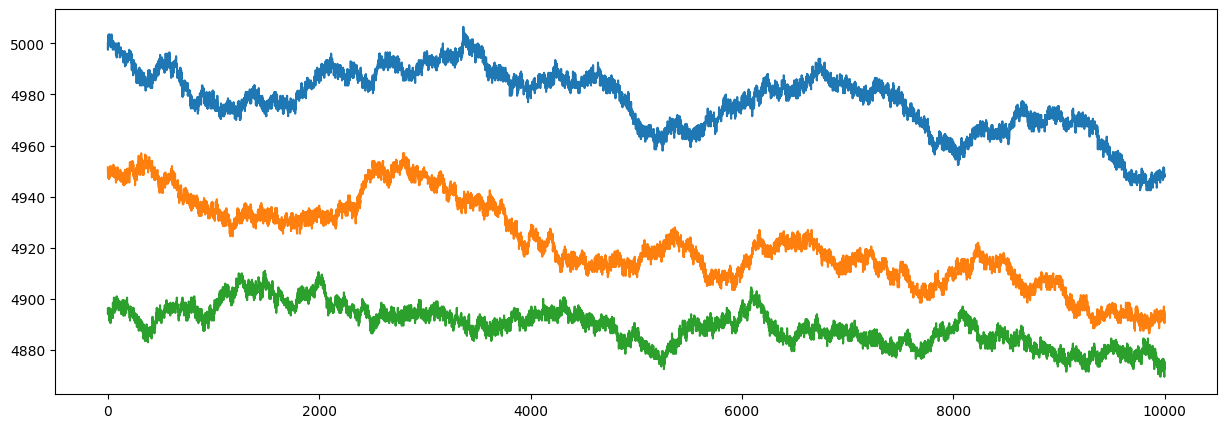

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, len(dn2_b['mid_price'])), dn2_b['mid_price'])
plt.plot(np.arange(0, len(dn1_b['mid_price'])), dn1_b['mid_price'])
plt.plot(np.arange(0, len(d0_b['mid_price'])), d0_b['mid_price'])

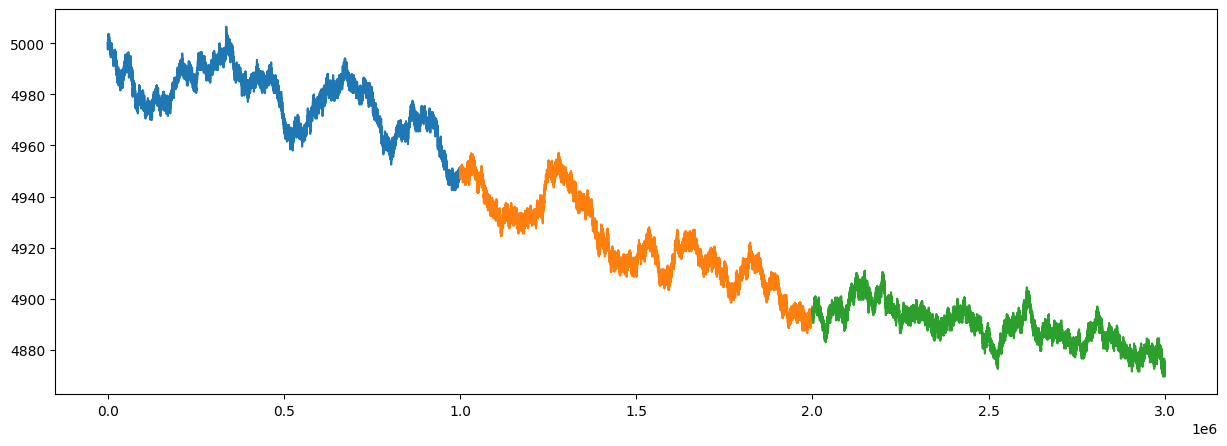

In [82]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(0, 1000000, 100), dn2_b['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), dn1_b['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), d0_b['mid_price'])

In [76]:
bananas = np.concatenate((dn2_b['mid_price'], dn1_b['mid_price'], d0_b['mid_price']))
bananas

array([5000. , 4997.5, 5000.5, ..., 4875.5, 4872.5, 4873. ])

In [92]:
reg = stats.linregress(np.arange(0, 3000000, 100), bananas)
print(f'R^2: {reg.rvalue**2:.6f}')
print(f'Intercept stderr: {reg.intercept_stderr}')

R^2: 0.928907
Intercept stderr: 0.11894678005576412


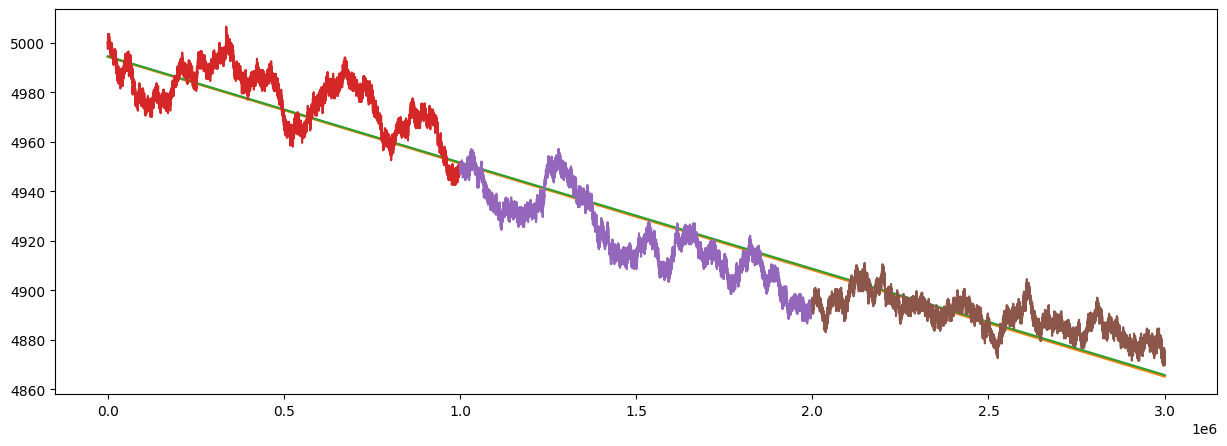

In [93]:
plt.figure(figsize=(15, 5))
x = np.arange(0, 3000000, 1)
plt.plot(x, reg.intercept + reg.slope * x)
plt.plot(x, reg.intercept - reg.intercept_stderr + (reg.slope - reg.stderr) * x)
plt.plot(x, reg.intercept + reg.intercept_stderr + (reg.slope + reg.stderr) * x)
plt.plot(np.arange(0, 1000000, 100), dn2_b['mid_price'])
plt.plot(np.arange(1000000, 2000000, 100), dn1_b['mid_price'])
plt.plot(np.arange(2000000, 3000000, 100), d0_b['mid_price'])

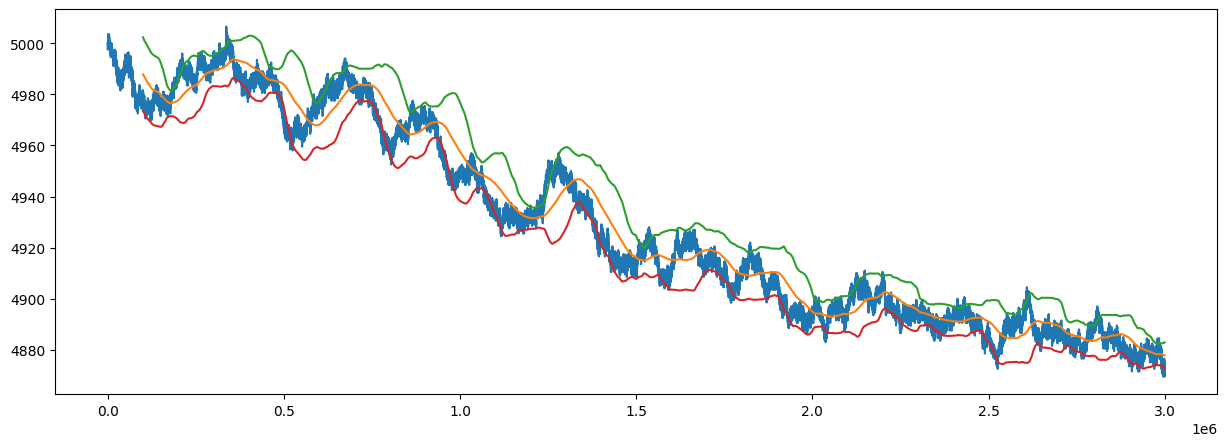

In [106]:
df = pd.DataFrame(bananas, columns=['mid_price'])

def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_std(prices, rate):
    return prices.rolling(rate).std()

rate = 1000

start = 0
end = 30000
xi = np.arange(start * 100, end * 100, 100)

sma = get_sma(df['mid_price'], rate)
std = get_std(df['mid_price'], rate)

plt.figure(figsize=(15,5))
plt.plot(xi, bananas[start:end])
plt.plot(xi, (sma)[start:end])
plt.plot(xi, (sma + 2 * std)[start:end])
plt.plot(xi, (sma - 2 * std)[start:end])
plt.show()

In [111]:
lower = sma - 2 * std


np.nanmin(lower[0:2500])

4967.263437793034